In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Model
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [30]:
def plot_confusion_matrix(model_input, feature, label, class_info):
    pred = model_input.predict(feature)
    cnf_matrix = confusion_matrix(np.argmax(label, axis=1), np.argmax(pred, axis=1))
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    tick_marks = np.arange(len(class_info))
    plt.xticks(tick_marks, class_info, rotation=45), plt.yticks(tick_marks, class_info)
    thresh = cnf_matrix.max()/2.
#     for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    for i in range(cnf_matrix.shape[0]):
        for j in range(cnf_matrix.shape[1]):
            plt.text(j, i, cnf_matrix[i, j], horizontalalignment='center', color='white' if cnf_matrix[i,j]>thresh else 'black')
    plt.ylabel('Actual'), plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

In [10]:
X_train = np.load('./dataset/X_train.npy')
X_test = np.load('./dataset/X_test.npy')
Y_train = np.load('./dataset/Y_train.npy')
Y_test = np.load('./dataset/Y_test.npy')

In [16]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(3000, 64, 64, 3) (1000, 64, 64, 3)
(3000, 3) (1000, 3)


In [20]:
model_input = Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))
H = Conv2D(16,kernel_size=(2,2),padding='same',activation='relu')(model_input)
H = MaxPooling2D((2,2))(H)
#32,32
H = Conv2D(16,kernel_size=(2,2),padding='same',activation='relu')(H)
H = MaxPooling2D((2,2))(H)
#16,16
H = Flatten()(H)
H = Dense(256,activation='tanh')(H)
model_out = Dense(3,activation='softmax')(H)
model_fdtect = Model(model_input,model_out)
model_fdtect.summary()

                    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 16)        1040      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1048832   
__________

In [29]:
model_fdtect.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_history = model_fdtect.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=100, verbose=2, shuffle=True)

Train on 3000 samples, validate on 1000 samples
Epoch 1/20
 - 16s - loss: 1.0745 - acc: 0.4947 - val_loss: 0.9065 - val_acc: 0.5460
Epoch 2/20
 - 15s - loss: 0.8902 - acc: 0.5780 - val_loss: 0.8796 - val_acc: 0.5830
Epoch 3/20
 - 15s - loss: 0.8208 - acc: 0.6237 - val_loss: 0.8122 - val_acc: 0.6230
Epoch 4/20
 - 16s - loss: 0.7430 - acc: 0.6643 - val_loss: 0.7689 - val_acc: 0.6500
Epoch 5/20
 - 15s - loss: 0.6850 - acc: 0.7077 - val_loss: 0.7820 - val_acc: 0.6550
Epoch 6/20
 - 16s - loss: 0.6704 - acc: 0.7113 - val_loss: 0.7627 - val_acc: 0.6580
Epoch 7/20
 - 14s - loss: 0.6094 - acc: 0.7520 - val_loss: 0.7293 - val_acc: 0.6790
Epoch 8/20
 - 15s - loss: 0.5779 - acc: 0.7700 - val_loss: 0.7126 - val_acc: 0.7040
Epoch 9/20
 - 16s - loss: 0.5295 - acc: 0.7837 - val_loss: 0.7030 - val_acc: 0.6930
Epoch 10/20
 - 15s - loss: 0.5261 - acc: 0.7823 - val_loss: 0.7218 - val_acc: 0.7130
Epoch 11/20
 - 15s - loss: 0.4864 - acc: 0.8147 - val_loss: 0.7112 - val_acc: 0.7250
Epoch 12/20
 - 16s - loss:

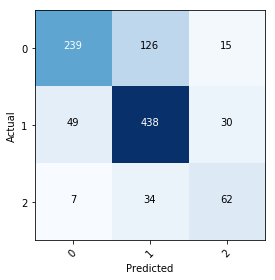

In [31]:
plot_confusion_matrix(model_fdtect, X_test, Y_test, range(0, 3))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
__________

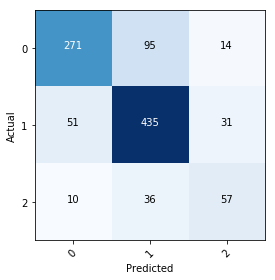

In [32]:
model_input = Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))
H = Conv2D(16,kernel_size=(2,2),padding='same',activation='tanh')(model_input)
H = MaxPooling2D((2,2))(H)
#32,32
H = Conv2D(32,kernel_size=(2,2),padding='same',activation='tanh')(H)
H = MaxPooling2D((2,2))(H)
#16,16
H = Flatten()(H)
H = Dense(256,activation='sigmoid')(H)
model_out = Dense(3,activation='softmax')(H)
model_fdtect = Model(model_input,model_out)
model_fdtect.summary()
model_fdtect.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_history = model_fdtect.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=100, verbose=2, shuffle=True)
plot_confusion_matrix(model_fdtect, X_test, Y_test, range(0, 3))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
__________

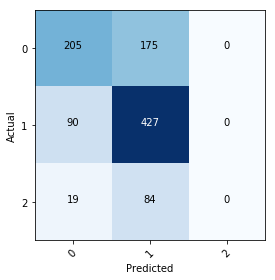

In [33]:
#none shuffle & none bagging
model_input = Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))
H = Conv2D(16,kernel_size=(2,2),padding='same',activation='tanh')(model_input)
H = MaxPooling2D((2,2))(H)
#32,32
H = Conv2D(32,kernel_size=(2,2),padding='same',activation='tanh')(H)
H = MaxPooling2D((2,2))(H)
#16,16
H = Flatten()(H)
H = Dense(256,activation='sigmoid')(H)
model_out = Dense(3,activation='softmax')(H)
model_fdtect = Model(model_input,model_out)
model_fdtect.summary()
model_fdtect.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_history = model_fdtect.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=1000, verbose=2, shuffle=False)
plot_confusion_matrix(model_fdtect, X_test, Y_test, range(0, 3))